# CIV1499 - Introduction to Data Science
## Project - Toronto Bike Share

## Setup Notebook

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pytz

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

### Formating of plot windows 
Centre of the Notebook

In [2]:
#centre all the charts
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
display: table-cell;
text-align: center;
vertical-align: middle;
}
</style>
""")

# 1. Weather Data
Prepare a database of the Weather data

In [3]:
#Get list of Weather Data File Names in the repository
weather_filenames = [filename for filename in os.listdir() if 'climate' in filename]
print(weather_filenames[0:5])

['en_climate_hourly_ON_6158359_08-2020_P1H.csv', 'en_climate_hourly_ON_6158359_09-2017_P1H.csv', 'en_climate_hourly_ON_6158359_09-2018_P1H.csv', 'en_climate_hourly_ON_6158359_09-2019_P1H.csv', 'en_climate_hourly_ON_6158359_09-2020_P1H.csv']


View the format of the Weather Data

In [4]:
df_weather_data = pd.read_csv(weather_filenames[0])
df_weather_data.head(10)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-08-01 00:00,2020,8,1,00:00,20.3,...,NaN,16.1,NaN,100.45,NaN,26.0,NaN,NaN,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-08-01 01:00,2020,8,1,01:00,20.4,...,NaN,16.1,NaN,100.42,NaN,26.0,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-08-01 02:00,2020,8,1,02:00,19.2,...,NaN,16.1,NaN,100.41,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-08-01 03:00,2020,8,1,03:00,19.1,...,NaN,16.1,NaN,100.38,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-08-01 04:00,2020,8,1,04:00,18.5,...,NaN,16.1,NaN,100.39,NaN,NaN,NaN,NaN,NaN,NaN
5,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-08-01 05:00,2020,8,1,05:00,18.2,...,NaN,16.1,NaN,100.41,NaN,NaN,NaN,NaN,NaN,NaN
6,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-08-01 06:00,2020,8,1,06:00,18.8,...,NaN,16.1,NaN,100.44,NaN,NaN,NaN,NaN,NaN,NaN
7,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-08-01 07:00,2020,8,1,07:00,22.8,...,NaN,11.3,NaN,100.48,NaN,28.0,NaN,NaN,NaN,NaN
8,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-08-01 08:00,2020,8,1,08:00,22.6,...,NaN,16.1,NaN,100.51,NaN,28.0,NaN,NaN,NaN,NaN
9,-79.4,43.63,TORONTO CITY CENTRE,6158359,2020-08-01 09:00,2020,8,1,09:00,22.8,...,NaN,16.1,NaN,100.54,NaN,29.0,NaN,NaN,NaN,NaN


All the weather data points in the data set are from a single weather station so the station information in a static variable and can be removed from the dataframe to reduce the data frame size

In [5]:
dic_weather_station_info = {'lon':df_weather_data['Longitude (x)'][0],'lat': df_weather_data['Latitude (y)'][0], 'Name':df_weather_data['Station Name'][0],'ID':df_weather_data['Climate ID'][0]}
df_weather_data = df_weather_data.drop(columns = ['Longitude (x)','Latitude (y)','Station Name','Climate ID'])
print(dic_weather_station_info)
df_weather_data.head()

{'lon': -79.4, 'lat': 43.63, 'Name': 'TORONTO CITY CENTRE', 'ID': 6158359}


,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2020-08-01 00:00,2020,8,1,00:00,20.3,NaN,17.0,NaN,81,...,NaN,16.1,NaN,100.45,NaN,26.0,NaN,NaN,NaN,NaN
1,2020-08-01 01:00,2020,8,1,01:00,20.4,NaN,17.2,NaN,81,...,NaN,16.1,NaN,100.42,NaN,26.0,NaN,NaN,NaN,NaN
2,2020-08-01 02:00,2020,8,1,02:00,19.2,NaN,17.2,NaN,88,...,NaN,16.1,NaN,100.41,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-01 03:00,2020,8,1,03:00,19.1,NaN,17.1,NaN,88,...,NaN,16.1,NaN,100.38,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-01 04:00,2020,8,1,04:00,18.5,NaN,17.0,NaN,91,...,NaN,16.1,NaN,100.39,NaN,NaN,NaN,NaN,NaN,NaN


### Concatinate all the files into a single data frame

In [6]:
df_weather_data = pd.DataFrame()

for file in weather_filenames:
    df_weather_data = pd.concat([df_weather_data,pd.read_csv(file)])

#clean data frame
#drop the station information, previously stored
df_weather_data = df_weather_data.drop(columns = ['Longitude (x)','Latitude (y)','Station Name','Climate ID'])
#drop list of features that have a nan description
lst_na_description = ['Temp Flag','Dew Point Temp Flag','Rel Hum Flag','Wind Dir Flag', 'Wind Spd Flag', 'Visibility Flag', 'Stn Press Flag', 'Hmdx Flag','Wind Chill Flag']
df_weather_data = df_weather_data.drop(columns = lst_na_description)

# View DataFrame
print(df_weather_data.shape)
df_weather_data.head()

(12456, 15)


,Date/Time,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
0,2020-08-01 00:00,2020,8,1,00:00,20.3,17.0,81.0,26.0,11.0,16.1,100.45,26.0,NaN,NaN
1,2020-08-01 01:00,2020,8,1,01:00,20.4,17.2,81.0,27.0,5.0,16.1,100.42,26.0,NaN,NaN
2,2020-08-01 02:00,2020,8,1,02:00,19.2,17.2,88.0,27.0,8.0,16.1,100.41,NaN,NaN,NaN
3,2020-08-01 03:00,2020,8,1,03:00,19.1,17.1,88.0,29.0,5.0,16.1,100.38,NaN,NaN,NaN
4,2020-08-01 04:00,2020,8,1,04:00,18.5,17.0,91.0,NaN,0.0,16.1,100.39,NaN,NaN,NaN


Investigate the number of unique values per feature

In [7]:
print(df_weather_data.isnull().sum()/df_weather_data.shape[0] * 100)
print('The number of data records in the data frame is:' ,df_weather_data.shape[0])

Date/Time               0.000000
Year                    0.000000
Month                   0.000000
Day                     0.000000
Time                    0.000000
Temp (°C)               2.785806
Dew Point Temp (°C)     2.785806
Rel Hum (%)             2.777778
Wind Dir (10s deg)      7.875723
Wind Spd (km/h)         2.777778
Visibility (km)         2.850032
Stn Press (kPa)         2.801863
Hmdx                   88.728324
Wind Chill             86.954078
Weather                84.971098
dtype: float64
The number of data records in the data frame is: 12456


There are 1.3% Null Temperatures records, as temperature is one of the focus features of the data frame all rows with a NAN temperature are to be removed.
> Above 80% of the Hmdx and Wind Chill are null values 

> 84% of the Weather values are null -> TO BE EXPLORED

In [8]:
df_weather_data['Weather'].unique().tolist()

[nan,
 'Rain',
 'Rain,Fog',
 'Moderate Rain,Fog',
 'Thunderstorms,Rain',
 'Moderate Rain',
 'Fog',
 'Haze',
 'Thunderstorms',
 'Thunderstorms,Moderate Rain,Fog',
 'Thunderstorms,Heavy Rain',
 'Thunderstorms,Moderate Rain',
 'Thunderstorms,Fog',
 'Heavy Rain,Fog',
 'Thunderstorms,Heavy Rain,Fog',
 'Snow',
 'Rain,Snow',
 'Freezing Rain,Fog',
 'Freezing Rain']

### No reference to 'clear days' 
> Assume nan = clear days and replace

In [9]:
df_weather_data['Weather'] = df_weather_data['Weather'].fillna('clear_day')

### Check changes have been effected

In [10]:
df_weather_data['Weather'].unique().tolist()

['clear_day',
 'Rain',
 'Rain,Fog',
 'Moderate Rain,Fog',
 'Thunderstorms,Rain',
 'Moderate Rain',
 'Fog',
 'Haze',
 'Thunderstorms',
 'Thunderstorms,Moderate Rain,Fog',
 'Thunderstorms,Heavy Rain',
 'Thunderstorms,Moderate Rain',
 'Thunderstorms,Fog',
 'Heavy Rain,Fog',
 'Thunderstorms,Heavy Rain,Fog',
 'Snow',
 'Rain,Snow',
 'Freezing Rain,Fog',
 'Freezing Rain']

In [11]:
df_weather_data['Hmdx'].unique().tolist()

[26.0,
 nan,
 28.0,
 29.0,
 30.0,
 32.0,
 33.0,
 31.0,
 34.0,
 27.0,
 25.0,
 37.0,
 36.0,
 35.0,
 38.0,
 40.0,
 39.0]

Drop humidity and wind chill features due to high magnitude of missing data

In [12]:
df_weather_data = df_weather_data.drop(columns = ['Hmdx','Wind Chill'])
#check to see how many nan values still exist
df_weather_data.isnull().sum()

Date/Time                0
Year                     0
Month                    0
Day                      0
Time                     0
Temp (°C)              347
Dew Point Temp (°C)    347
Rel Hum (%)            346
Wind Dir (10s deg)     981
Wind Spd (km/h)        346
Visibility (km)        355
Stn Press (kPa)        349
Weather                  0
dtype: int64

### Current data set indicates 459 records with no temperature data. As temperature is a focus at a later stage these records will be removed from the Data set. 

In [13]:
df_weather_data = df_weather_data[df_weather_data['Temp (°C)'].notnull()]
df_weather_data.head()

,Date/Time,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2020-08-01 00:00,2020,8,1,00:00,20.3,17.0,81.0,26.0,11.0,16.1,100.45,clear_day
1,2020-08-01 01:00,2020,8,1,01:00,20.4,17.2,81.0,27.0,5.0,16.1,100.42,clear_day
2,2020-08-01 02:00,2020,8,1,02:00,19.2,17.2,88.0,27.0,8.0,16.1,100.41,clear_day
3,2020-08-01 03:00,2020,8,1,03:00,19.1,17.1,88.0,29.0,5.0,16.1,100.38,clear_day
4,2020-08-01 04:00,2020,8,1,04:00,18.5,17.0,91.0,NaN,0.0,16.1,100.39,clear_day


In [14]:
df_weather_data.isnull().sum()/df_weather_data.shape[0]*100

Date/Time              0.000000
Year                   0.000000
Month                  0.000000
Day                    0.000000
Time                   0.000000
Temp (°C)              0.000000
Dew Point Temp (°C)    0.000000
Rel Hum (%)            0.000000
Wind Dir (10s deg)     5.235775
Wind Spd (km/h)        0.000000
Visibility (km)        0.066067
Stn Press (kPa)        0.016517
Weather                0.000000
dtype: float64

In [15]:
df_weather_data['Wind Dir (10s deg)'].unique().tolist()

[26.0,
 27.0,
 29.0,
 nan,
 18.0,
 11.0,
 9.0,
 8.0,
 7.0,
 6.0,
 14.0,
 12.0,
 17.0,
 19.0,
 21.0,
 20.0,
 28.0,
 30.0,
 23.0,
 24.0,
 5.0,
 4.0,
 3.0,
 10.0,
 22.0,
 1.0,
 31.0,
 25.0,
 15.0,
 13.0,
 16.0,
 32.0,
 33.0,
 35.0,
 34.0,
 36.0,
 2.0]

### Assuming the wind speed is equal to 0 then the direction would be underfined. For the purpose of this database if the wind speed is equal to 0 then the wind direction will be set to 0. 

In [16]:
lst_to_replace = (df_weather_data['Wind Spd (km/h)'] == 0) & (df_weather_data['Wind Dir (10s deg)'].isnull())
idx_cntr = 0
for x in lst_to_replace:
    if x: 
        df_weather_data.loc[idx_cntr,'Wind Dir (10s deg)'] = 0
        
df_weather_data.isnull().sum()/df_weather_data.shape[0]*100

Date/Time              0.000000
Year                   0.000000
Month                  0.000000
Day                    0.000000
Time                   0.000000
Temp (°C)              0.000000
Dew Point Temp (°C)    0.000000
Rel Hum (%)            0.000000
Wind Dir (10s deg)     5.227517
Wind Spd (km/h)        0.000000
Visibility (km)        0.066067
Stn Press (kPa)        0.016517
Weather                0.000000
dtype: float64

The effect of the missing data has been minimised and all nan values will now be removed from the data set

In [17]:
df_weather_data.dropna(axis = 0, inplace = True)
print(df_weather_data.shape)
df_weather_data.head()

(11466, 13)


,Date/Time,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2020-08-01 00:00,2020,8,1,00:00,20.3,17.0,81.0,0.0,11.0,16.1,100.45,clear_day
1,2020-08-01 01:00,2020,8,1,01:00,20.4,17.2,81.0,27.0,5.0,16.1,100.42,clear_day
2,2020-08-01 02:00,2020,8,1,02:00,19.2,17.2,88.0,27.0,8.0,16.1,100.41,clear_day
3,2020-08-01 03:00,2020,8,1,03:00,19.1,17.1,88.0,29.0,5.0,16.1,100.38,clear_day
5,2020-08-01 05:00,2020,8,1,05:00,18.2,16.9,92.0,18.0,4.0,16.1,100.41,clear_day


## Final Weather Data Set Preparation
> Set Date/Time as index
>> add EST time zone to the time

In [18]:
df_weather_data = df_weather_data.set_index('Date/Time')
df_weather_data.index = pd.DatetimeIndex(df_weather_data.index)
time_zone_UTC = pytz.timezone('UTC')
time_zone_est = pytz.timezone('Canada/Eastern')
df_weather_data.index = df_weather_data.index.tz_localize(time_zone_UTC)  
df_weather_data.index = df_weather_data.index.tz_convert(time_zone_est)
# View DataFrame
df_weather_data.head()

,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,,
2020-07-31 20:00:00-04:00,2020,8,1,00:00,20.3,17.0,81.0,0.0,11.0,16.1,100.45,clear_day
2020-07-31 21:00:00-04:00,2020,8,1,01:00,20.4,17.2,81.0,27.0,5.0,16.1,100.42,clear_day
2020-07-31 22:00:00-04:00,2020,8,1,02:00,19.2,17.2,88.0,27.0,8.0,16.1,100.41,clear_day
2020-07-31 23:00:00-04:00,2020,8,1,03:00,19.1,17.1,88.0,29.0,5.0,16.1,100.38,clear_day
2020-08-01 01:00:00-04:00,2020,8,1,05:00,18.2,16.9,92.0,18.0,4.0,16.1,100.41,clear_day


In [19]:
df_weather_data.describe()

,Year,Month,Day,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
count,11466.000000,11466.000000,11466.000000,11466.000000,11466.000000,11466.000000,11466.000000,11466.000000,11466.000000,11466.000000
mean,2018.554771,10.337345,15.544479,9.139578,4.720155,74.789116,19.747427,17.712541,15.158608,100.783533
std,1.128782,1.218521,8.798871,8.672787,9.003915,13.056234,9.893751,9.653394,2.914143,0.802703
min,2017.000000,8.000000,1.000000,-19.300000,-26.100000,31.000000,0.000000,4.000000,0.200000,97.730000
25%,2018.000000,9.000000,8.000000,2.500000,-1.600000,66.000000,8.000000,11.000000,16.100000,100.280000
50%,2019.000000,10.000000,15.000000,8.500000,4.200000,75.000000,23.000000,15.000000,16.100000,100.850000
75%,2020.000000,11.000000,23.000000,16.300000,11.700000,85.000000,28.000000,24.000000,16.100000,101.330000
max,2020.000000,12.000000,31.000000,31.600000,24.400000,100.000000,36.000000,68.000000,16.100000,103.040000


# View data

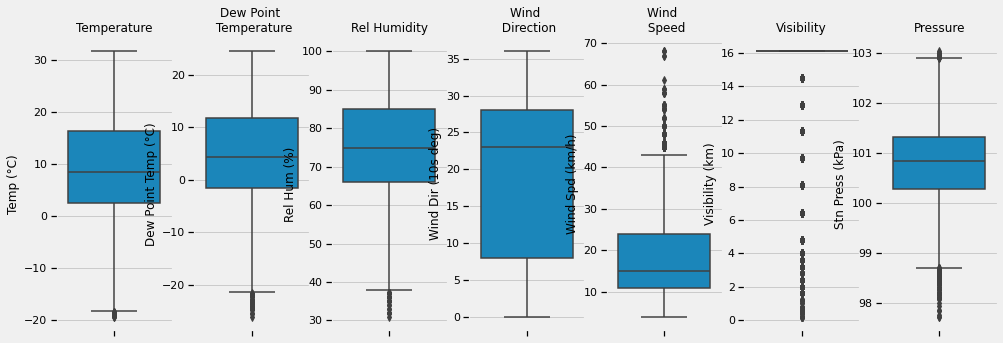

In [20]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1,7,figsize = (15,5))

sns.boxplot(y = 'Temp (°C)', data = df_weather_data, ax = ax1)
ax1.set_title('Temperature')

sns.boxplot(y = 'Dew Point Temp (°C)', data = df_weather_data, ax = ax2)
ax2.set_title('Dew Point \n Temperature')

sns.boxplot(y = 'Rel Hum (%)', data = df_weather_data, ax = ax3)
ax3.set_title('Rel Humidity')

sns.boxplot(y = 'Wind Dir (10s deg)', data = df_weather_data, ax = ax4)
ax4.set_title('Wind \n Direction')

sns.boxplot(y = 'Wind Spd (km/h)', data = df_weather_data, ax = ax5)
ax5.set_title('Wind \n Speed')

sns.boxplot(y = 'Visibility (km)', data = df_weather_data, ax = ax6)
ax6.set_title('Visibility')

sns.boxplot(y = 'Stn Press (kPa)', data = df_weather_data, ax = ax7)
ax7.set_title('Pressure')

fig.show()

In [21]:
print('{:.2f}% of the weather records indicate a visibility 16.1 km, while {:.2f}% of the days are have clear skies'
      .format((df_weather_data['Visibility (km)'] == 16.1).sum()/df_weather_data.shape[0]*100
              , (df_weather_data['Weather'] == 'clear_day').sum()/df_weather_data.shape[0]*100))

87.91% of the weather records indicate a visibility 16.1 km, while 84.70% of the days are have clear skies


### Due to the relationship between the Visibility and clear days it is plausable that a high number of records indicate 16.1 km of visibility

In [22]:
#export the data frame
df_weather_data.to_csv('cleaned_weather_data_set.csv')

# 2. Bike Share Trip Data

In [24]:
# Create a list of file names for bike share trips data
trips_filenames = [filename for filename in os.listdir() if 'bike_share' in filename]

# Create a dictionary where key:value pairs correspond to 
# the file name and DataFrame respectively
trips_data = {filename: pd.read_csv(filename) for filename in trips_filenames}

# Now lets print out the column names for the first month of each year
print('2017\n{}\n'.format(trips_data['bike_share_2017-1.csv'].columns.tolist()))
print('2018\n{}\n'.format(trips_data['bike_share_2018-1.csv'].columns.tolist()))
print('2019\n{}\n'.format(trips_data['bike_share_2019-1.csv'].columns.tolist()))
print('2020\n{}\n'.format(trips_data['bike_share_2020-1.csv'].columns.tolist()))

2017
['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'user_type']

2018
['trip_id', 'trip_duration_seconds', 'from_station_id', 'trip_start_time', 'from_station_name', 'trip_stop_time', 'to_station_id', 'to_station_name', 'user_type']

2019
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']

2020
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']



In [263]:
# Build two data frames to be merged later
df_trips_data = pd.DataFrame()

for file in trips_filenames:
    if '2017' in file:
        df_trips_data= pd.concat([df_trips_data,pd.read_csv(file)])

#correct the order of the columns from 2017 to match 2018
df_trips_data = df_trips_data[trips_data['bike_share_2018-1.csv'].columns.tolist()]

#add the 2018 files to the list
for file in trips_filenames:
    if '2018' in file:
        df_trips_data= pd.concat([df_trips_data,pd.read_csv(file)])

#correct column names and add additional columns for Bike ID and subscription ID
df_trips_data['Bike Id'] = np.zeros(df_trips_data.shape[0])
df_trips_data['Subscription Id'] = np.zeros(df_trips_data.shape[0])
#correct the order of the columns to match the 2019/2020 data
cols = df_trips_data.columns.tolist()
new_order = [0,10,1,2,3,4,6,5,7,9,8]
cols = [cols[i] for i in new_order]

#reorder columns of the Data frame
df_trips_data = df_trips_data[cols]

#rename column headers of the data frame
df_trips_data.columns = trips_data['bike_share_2019-1.csv'].columns.tolist()

#complete the reading of all the files to the dataframe
for file in trips_filenames:
    if ('2019' in file) |('2020' in file) :
        df_trips_data  = pd.concat([df_trips_data ,pd.read_csv(file)])

# Let's remove double spaces from the column names
df_trips_data.columns = ['_'.join(col.split()) for col in df_trips_data.columns]              

#view data frame   
df_trips_data.head()

,Trip_Id,Subscription_Id,Trip_Duration,Start_Station_Id,Start_Time,Start_Station_Name,End_Station_Id,End_Time,End_Station_Name,Bike_Id,User_Type
0,712441,0.0,274,7006.0,2017-01-01 05:03 (UTC),Bay St / College St (East Side),7021.0,2017-01-01 05:08 (UTC),Bay St / Albert St,0.0,Member
1,712442,0.0,538,7046.0,2017-01-01 05:03 (UTC),Niagara St / Richmond St W,7147.0,2017-01-01 05:12 (UTC),King St W / Fraser Ave,0.0,Member
2,712443,0.0,992,7048.0,2017-01-01 05:05 (UTC),Front St / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 05:22 (UTC),Church St / Wood St,0.0,Member
3,712444,0.0,1005,7177.0,2017-01-01 05:09 (UTC),East Liberty St / Pirandello St,7202.0,2017-01-01 05:26 (UTC),Queen St W / York St (City Hall),0.0,Member
4,712445,0.0,645,7203.0,2017-01-01 05:14 (UTC),Bathurst St / Queens Quay W,7010.0,2017-01-01 05:25 (UTC),King St W / Spadina Ave,0.0,Member


In [264]:
print("{:.1f} % of the trip Id's are unique".format(len(df_trips_data['Trip_Id'].unique())/df_trips_data.shape[0]*100))
df_trips_data.shape

100.0 % of the trip Id's are unique


(8467545, 11)

In [265]:
df_trips_data.isnull().sum()/df_trips_data.shape[0]*100

Trip_Id                0.000000
Subscription_Id        0.000000
Trip_Duration          0.000000
Start_Station_Id      12.127399
Start_Time             0.000000
Start_Station_Name     0.001937
End_Station_Id        12.142351
End_Time               0.000012
End_Station_Name       0.016640
Bike_Id                0.000000
User_Type              0.000000
dtype: float64

Remove entry if both the station Id and Station Name is missing

In [266]:
df_trips_data = df_trips_data[~(df_trips_data['Start_Station_Name'].isnull() & df_trips_data['Start_Station_Id'].isnull())]
df_trips_data = df_trips_data[~(df_trips_data['End_Station_Name'].isnull() & df_trips_data['End_Station_Id'].isnull())]

In [267]:
df_trips_data.isnull().sum()/df_trips_data.shape[0]*100

Trip_Id                0.000000
Subscription_Id        0.000000
Trip_Duration          0.000000
Start_Station_Id      12.129202
Start_Time             0.000000
Start_Station_Name     0.001937
End_Station_Id        12.129202
End_Time               0.000000
End_Station_Name       0.001677
Bike_Id                0.000000
User_Type              0.000000
dtype: float64

## Station ID's
A number of the station ID's are missing, these could be substituded using the station name

# 3. Station Data

In [268]:
stations = pd.read_csv('bikeshare_stations.csv')
stations.head()

,Station Id,Station Name,lat,lon,capacity
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954,35
1,7001,Lower Jarvis St / The Esplanade,43.647830,-79.370698,15
2,7002,St. George St / Bloor St W,43.667333,-79.399429,19
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761,15
4,7004,University Ave / Elm St,43.656518,-79.389099,11


In [269]:
stations.isnull().sum()/stations.shape[0]*100

Station Id      0.0
Station Name    0.0
lat             0.0
lon             0.0
capacity        0.0
dtype: float64

## Station Name Replacement based on Station Id

In [270]:
#Station Name Replacement based on Station ID
def id_name_find_replace(df,feature):
    
    #build feature name
    feature_name = feature+'_Station_Name'
    feature_Id = feature+'_Station_Id'
    
    df_missing_name = df[df[feature_name].isnull() & df[feature_Id].notnull()]
    df = df[~(df[feature_name].isnull() & df[feature_Id].notnull())]
    
    lst_id = df_missing_name[feature_Id].unique().tolist()
    for stat_id in lst_id:
        mask = df_missing_name[feature_Id] == stat_id
        df_missing_name.loc[mask,feature_name] = stations[stations['Station Id'] == stat_id]['Station Id'].tolist()[0]
        
    return df.append(df_missing_name)


df_trips_data = id_name_find_replace(df_trips_data,'Start')
df_trips_data = id_name_find_replace(df_trips_data,'End')

df_trips_data.isnull().sum()/df_trips_data.shape[0]*100

Trip_Id                0.000000
Subscription_Id        0.000000
Trip_Duration          0.000000
Start_Station_Id      12.129202
Start_Time             0.000000
Start_Station_Name     0.000000
End_Station_Id        12.129202
End_Time               0.000000
End_Station_Name       0.000000
Bike_Id                0.000000
User_Type              0.000000
dtype: float64

To fix the missing station ID's merge the stations dataframe and the 

In [271]:
mask = df_trips_data['Start_Station_Name'] == 'Front St / Yonge St (Hockey Hall of Fame)'
df_trips_data.loc[mask, 'Start_Station_Id'] = 7048

In [272]:
df_trips_data.isnull().sum()/df_trips_data.shape[0]*100

Trip_Id                0.000000
Subscription_Id        0.000000
Trip_Duration          0.000000
Start_Station_Id      12.129202
Start_Time             0.000000
Start_Station_Name     0.000000
End_Station_Id        12.129202
End_Time               0.000000
End_Station_Name       0.000000
Bike_Id                0.000000
User_Type              0.000000
dtype: float64

In [273]:
def simple_replace_station_ID(df, feature):
    #search stations data frame for missing ID's
    #create list of unique start station names
    feature_name = feature+'_Station_Name'
    feature_Id = feature+'_Station_Id'
    
    df_missing_station_id = df[df[feature_Id].isnull()]
    df = df[df[feature_Id].notnull()]
    
    lst_station_names = df_missing_station_id[feature_name].unique().tolist()
    #itterate through list and replace station Id's if found
    for name in lst_station_names:
        #check name exists in list of station names
        if (stations['Station Name'] == name).sum()>0:
            mask = df_missing_station_id[feature_name] == name
            station_id = stations[stations['Station Name'] == name]['Station Id'].to_numpy()[0]
            df_missing_station_id.loc[mask,feature_Id] = station_id
    df = df.append(df_missing_station_id)
    return df

df_trips_data = simple_replace_station_ID(df_trips_data,'Start')
df_trips_data = simple_replace_station_ID(df_trips_data,'End')

print(df_trips_data.shape)
df_trips_data.head()

(8466278, 11)


,Trip_Id,Subscription_Id,Trip_Duration,Start_Station_Id,Start_Time,Start_Station_Name,End_Station_Id,End_Time,End_Station_Name,Bike_Id,User_Type
0,712441,0.0,274,7006.0,2017-01-01 05:03 (UTC),Bay St / College St (East Side),7021.0,2017-01-01 05:08 (UTC),Bay St / Albert St,0.0,Member
1,712442,0.0,538,7046.0,2017-01-01 05:03 (UTC),Niagara St / Richmond St W,7147.0,2017-01-01 05:12 (UTC),King St W / Fraser Ave,0.0,Member
2,712443,0.0,992,7048.0,2017-01-01 05:05 (UTC),Front St / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 05:22 (UTC),Church St / Wood St,0.0,Member
3,712444,0.0,1005,7177.0,2017-01-01 05:09 (UTC),East Liberty St / Pirandello St,7202.0,2017-01-01 05:26 (UTC),Queen St W / York St (City Hall),0.0,Member
4,712445,0.0,645,7203.0,2017-01-01 05:14 (UTC),Bathurst St / Queens Quay W,7010.0,2017-01-01 05:25 (UTC),King St W / Spadina Ave,0.0,Member


In [274]:
df_trips_data.isnull().sum()/df_trips_data.shape[0]*100

Trip_Id               0.000000
Subscription_Id       0.000000
Trip_Duration         0.000000
Start_Station_Id      2.447498
Start_Time            0.000000
Start_Station_Name    0.000000
End_Station_Id        2.445183
End_Time              0.000000
End_Station_Name      0.000000
Bike_Id               0.000000
User_Type             0.000000
dtype: float64

# Variations in Spelling / Naming convention
Look at remaining items maybe difference in spelling or variation in naming 
>Front St W vs Front St

>Lakeshore vs Lake Shore


In [275]:
df_trips_data[df_trips_data['Start_Station_Id'].isnull()]['Start_Station_Name'].unique().tolist()

['Beverly St / College St',
 'University Ave / College St',
 'Bathurst St / Lennox St',
 'Dovercourt Rd / Harrison St - SMART',
 'Bloor St / Brunswick Ave',
 'Roxton Rd / College St',
 'University Ave / King St W',
 'Dockside Dr / Queens Quay E (Sugar Beach)',
 'Beverly  St / Dundas St W',
 '80 Clinton St (North of College)',
 'Michael Sweet Ave / St. Patrick St',
 'Bridgeman Ave / Bathurst St',
 'Simcoe St / Dundas St W',
 'Victoria St / Gould St (Ryerson University)',
 'Queens Park / Bloor St W',
 'Lansdowne Subway Green P',
 'Wellesley St E / Yonge St (Green P)',
 'Bathurst St / Queens Quay W',
 'Dufferin St / Bloor St',
 'Fort York  Blvd / Capreol Crt',
 'Lake Shore Blvd W / Ontario Dr(Ontario Place)',
 'Fringe Next Stage - 7219',
 'York St / King St W - SMART',
 'Macpherson Ave / Spadina Rd',
 'Bloor St W / Christie St',
 'Ossington Ave / Bloor St W',
 'Queen St W / Shaw St',
 'Simcoe St / Wellington St W',
 'Bremner Blvd / Spadina Ave',
 'University Ave / Gerrard St W',
 'Sterlin

In [276]:
stations[(stations['Station Name'].str.contains('Lake Shore'))]# & (stations['Station Name'].str.contains('Bloor'))]

,Station Id,Station Name,lat,lon,capacity
163,7171,Ontario Place Blvd / Lake Shore Blvd W (East),43.632244,-79.410810,27
201,7220,Lake Shore Blvd W / Ellis Ave,43.635932,-79.465083,19
206,7225,Lake Shore Blvd W / Windermere Ave,43.634896,-79.467763,19
207,7226,Lake Shore Blvd W / The Boulevard Club,43.636731,-79.444966,19
223,7242,Lake Shore Blvd W / Ontario Dr,43.630254,-79.420317,35
240,7259,Lower Spadina Ave / Lake Shore Blvd,43.638497,-79.391920,19
284,7313,Coxwell Ave / Lake Shore Blvd E,43.662771,-79.315223,15
290,7319,Lake Shore Blvd E / Knox Ave,43.660206,-79.324400,11
327,7357,Lake Shore Blvd E / Leslie St,43.659195,-79.329196,19
388,7427,Northern Dancer Blvd / Lake Shore Blvd E,43.663162,-79.309765,27


Develope a simple search comparing street names i.e first word in string and first word after /

In [277]:
def street_cnr_find_replace(df,feature):
    
    feature_name = feature+"_Station_Name"
    feature_Id = feature +"_Station_Id"
    
    #get df of records to work with
    df_missing_station_id = df[df[feature_Id].isnull()]
    #remove records from original data frame
    df = df[df[feature_Id].notnull()]
    
    #get list of unique station names
    lst_station_names = df_missing_station_id['Start_Station_Name'].unique().tolist()
    
    #format list of names into a data frame containing the two street corners
    #remove all cases were there is a single street, to be delt with l
    lst_station_names = [x.split('/') for x in lst_station_names]
    df_street_names = pd.DataFrame(lst_station_names, columns = {'cnr1', 'cnr2'})
    df_street_names.cnr1 = df_street_names.cnr1.str.strip()
    df_street_names.cnr2 = df_street_names.cnr2.str.strip()
    df_street_names.dropna(inplace = True)

    df_street_names['cnr1'] = [x.split(' ')[0] for x in df_street_names['cnr1']]
    df_street_names['cnr2'] = [x.split(' ')[0] for x in df_street_names['cnr2']]

    
    for indx in df_street_names.index:
        street1 = df_street_names.loc[indx,'cnr1']
        street2 = df_street_names.loc[indx,'cnr2']
        df_station_result = stations[stations['Station Name'].str.contains(street1) 
                                     & stations['Station Name'].str.contains(street2)]
        
        if (df_station_result.shape[0] ==1) &( ~(df_station_result.empty)):
            mask = (df_missing_station_id[feature_name].str.contains(street1)) & (df_missing_station_id[feature_name].str.contains(street2))
            df_missing_station_id.loc[mask,feature_Id] = df_station_result['Station Id'].tolist()[0]
    
    #relink to original dataframe
    return df.append(df_missing_station_id)
    
#clean list


df_trips_data  = street_cnr_find_replace(df_trips_data,'Start')
df_trips_data  = street_cnr_find_replace(df_trips_data,'End')
df_trips_data.head()


,Trip_Id,Subscription_Id,Trip_Duration,Start_Station_Id,Start_Time,Start_Station_Name,End_Station_Id,End_Time,End_Station_Name,Bike_Id,User_Type
0,712441,0.0,274,7006.0,2017-01-01 05:03 (UTC),Bay St / College St (East Side),7021.0,2017-01-01 05:08 (UTC),Bay St / Albert St,0.0,Member
1,712442,0.0,538,7046.0,2017-01-01 05:03 (UTC),Niagara St / Richmond St W,7147.0,2017-01-01 05:12 (UTC),King St W / Fraser Ave,0.0,Member
2,712443,0.0,992,7048.0,2017-01-01 05:05 (UTC),Front St / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 05:22 (UTC),Church St / Wood St,0.0,Member
3,712444,0.0,1005,7177.0,2017-01-01 05:09 (UTC),East Liberty St / Pirandello St,7202.0,2017-01-01 05:26 (UTC),Queen St W / York St (City Hall),0.0,Member
4,712445,0.0,645,7203.0,2017-01-01 05:14 (UTC),Bathurst St / Queens Quay W,7010.0,2017-01-01 05:25 (UTC),King St W / Spadina Ave,0.0,Member


In [278]:
df_station_result['Station Id'].isnull()

Series([], Name: Station Id, dtype: bool)

In [279]:
df_trips_data.isnull().sum()/df_trips_data.shape[0]*100

Trip_Id               0.000000
Subscription_Id       0.000000
Trip_Duration         0.000000
Start_Station_Id      1.547988
Start_Time            0.000000
Start_Station_Name    0.000000
End_Station_Id        1.554107
End_Time              0.000000
End_Station_Name      0.000000
Bike_Id               0.000000
User_Type             0.000000
dtype: float64

In [280]:
df_trips_data[df_trips_data['Start_Station_Id'].isnull()]['Start_Station_Name'].unique().tolist()

['University Ave / College St',
 'Bloor St / Brunswick Ave',
 'Roxton Rd / College St',
 'Beverly St / College St',
 'Beverly  St / Dundas St W',
 'Victoria St / Gould St (Ryerson University)',
 'Queens Park / Bloor St W',
 'Lansdowne Subway Green P',
 'Wellesley St E / Yonge St (Green P)',
 'Lake Shore Blvd W / Ontario Dr(Ontario Place)',
 'Fringe Next Stage - 7219',
 'Queen St W / Shaw St',
 '80 Clinton St (North of College)',
 'Bremner Blvd / Spadina Ave',
 'University Ave / Gerrard St W',
 'Simcoe St / Dundas St W',
 'Simcoe St / Wellington St W',
 'Lakeshore Blvd W / The Boulevard Club',
 'Bathurst Subway Station',
 'Dockside Dr / Queens Quay E (Sugar Beach)',
 'Lakeshore Blvd W / Ellis Ave',
 'Bay St / Bloor St W',
 'Queen St E / Larchmount Ave',
 'Woodbine Subway Green P (Cedarvale Ave)',
 'Queen St E / Berkely St',
 'Ontario Place Blvd / Remembrance Dr',
 'Margueretta St / College St',
 'Bay St / Davenport Rd',
 'Summerhill Ave / MacLennan Ave - SMART',
 'Chester Station',
 'St

Univeristy Ave / College St -> there is an East and a West
Bloor St and Brunswick -> no brunswick street in the stations DF
Roxton Rd / College St -> no ID in data base remove
Beverly St / College St -> 7161 manual fix
Beverly  St / Dundas St W -> 7027


In [317]:
#replace spelling of Beverly  to Beverley
df_trips_data['Start_Station_Name'] = df_trips_data['Start_Station_Name'].astype(str)
df_trips_data['Start_Station_Name'] = [x.replace('Beverly','Beverley') for x in df_trips_data['Start_Station_Name']]
df_trips_data['Start_Station_Name'] = [x.replace('Lakeshore','Lake Shore') for x in df_trips_data['Start_Station_Name']]
df_trips_data['End_Station_Name'].astype(str)
df_trips_data['End_Station_Name'] = [str(x).replace('Beverly','Beverley') for x in df_trips_data['End_Station_Name']]
df_trips_data['Start_Station_Name'] = [str(x).replace('Lakeshore','Lake Shore') for x in df_trips_data['End_Station_Name']]

df_trips_data  = street_cnr_find_replace(df_trips_data,'Start')
df_trips_data  = street_cnr_find_replace(df_trips_data,'End')
df_trips_data.head()

,Trip_Id,Subscription_Id,Trip_Duration,Start_Station_Id,Start_Time,Start_Station_Name,End_Station_Id,End_Time,End_Station_Name,Bike_Id,User_Type
0,712441,0.0,274,7006.0,2017-01-01 05:03 (UTC),Bay St / Albert St,7021.0,2017-01-01 05:08 (UTC),Bay St / Albert St,0.0,Member
1,712442,0.0,538,7046.0,2017-01-01 05:03 (UTC),King St W / Fraser Ave,7147.0,2017-01-01 05:12 (UTC),King St W / Fraser Ave,0.0,Member
2,712443,0.0,992,7048.0,2017-01-01 05:05 (UTC),Church St / Wood St,7089.0,2017-01-01 05:22 (UTC),Church St / Wood St,0.0,Member
3,712444,0.0,1005,7177.0,2017-01-01 05:09 (UTC),Queen St W / York St (City Hall),7202.0,2017-01-01 05:26 (UTC),Queen St W / York St (City Hall),0.0,Member
4,712445,0.0,645,7203.0,2017-01-01 05:14 (UTC),King St W / Spadina Ave,7010.0,2017-01-01 05:25 (UTC),King St W / Spadina Ave,0.0,Member


In [318]:
df_trips_data.isnull().sum()/df_trips_data.shape[0]*100

Trip_Id               0.000000
Subscription_Id       0.000000
Trip_Duration         0.000000
Start_Station_Id      0.499818
Start_Time            0.000000
Start_Station_Name    0.000000
End_Station_Id        1.322092
End_Time              0.000000
End_Station_Name      0.000000
Bike_Id               0.000000
User_Type             0.000000
dtype: float64

In [319]:
df_trips_data[df_trips_data['Start_Station_Id'].isnull()]['Start_Station_Name'].unique().tolist()

['Castle Frank Station',
 'Dundas St W / Yonge St',
 'The Royal Ontario Museum (Bloor St Entrance)',
 'Humber Bay Shores Park West',
 'Dundas St W / St. Patrick St',
 'Toronto Eaton Centre (Yonge St)',
 'Simcoe St / Queen St W',
 '519 Church St - SMART',
 'Queens Quay W / Lower Simcoe St',
 'Bay St / College St (West Side) - SMART',
 'Exhibition GO (Atlantic Ave)',
 'St. George St / Bloor St W',
 'University Ave / Elm St',
 '424 Wellington St W',
 'Humber Bay Shores Park East',
 'Jimmie Simpson Park (Queen St E)',
 'Lower Sherbourne St / The Esplanade',
 '51 Parliament St',
 'Front St W / Bay St (North Side)',
 'Bathurst St / Fort York Blvd',
 'Union Station',
 'College Park South',
 'Central Tech  (Harbord St)',
 'Sunnyside - Gus Ryder Pool',
 'King St W / Bay St (West Side)',
 'Summerhill Station',
 'Bay St / College St (East Side)',
 'Chorley Park - SMART',
 'HTO Park (Queens Quay W)',
 'Dufferin Gate - SMART',
 'Martin Goodman Trail (Marilyn Bell Park)',
 'Queen St W / York St (Cit

In [321]:
stations[stations['Station Name'].str.contains('Chester Station')]

,Station Id,Station Name,lat,lon,capacity
91,7094,Chester Station (Green P),43.678456,-79.351014,7
